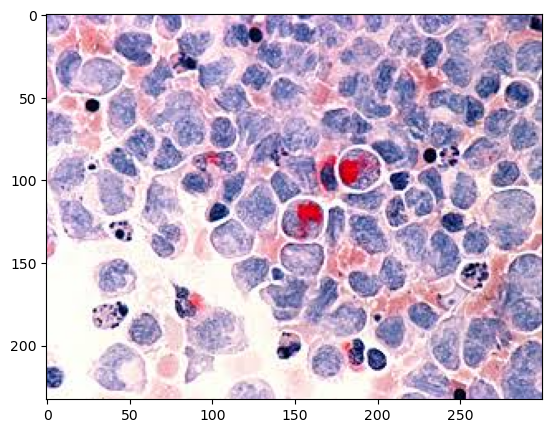

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[10,5]
img_cancerbgr=cv2.imread('cancer.jpg')#imagen trabajada
img_cancerrbg=plt.imread('cancer.jpg')
imagen=cv2.cvtColor(img_cancerbgr,cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.show()

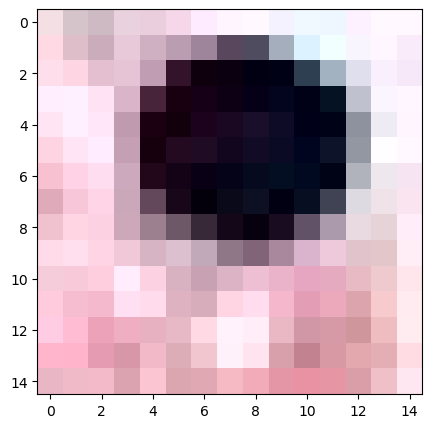

In [3]:
plt.imshow(imagen[50:65,20:35,:])#identificar por x,y y color rgb

plt.show()

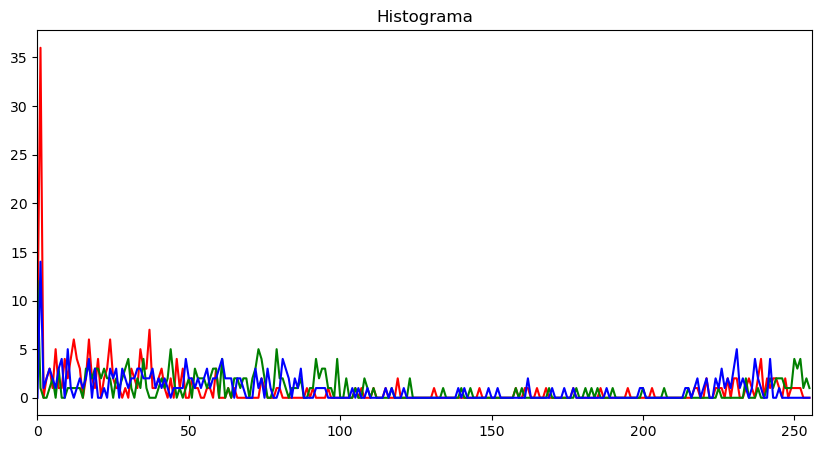

In [16]:
celula_cancer=imagen[50:65,20:35,:]
plt.imsave('celula_cancer.jpg',celula_cancer)
celula=plt.imread('celula_cancer.jpg')
color= ('r','g','b')
for canal, col in enumerate(color):
    histograma=cv2.calcHist([celula*255],[canal],None,[256],[0,256])
    plt.plot(histograma,color=col)
    plt.xlim([0,256])

plt.title('Histograma')
plt.show()

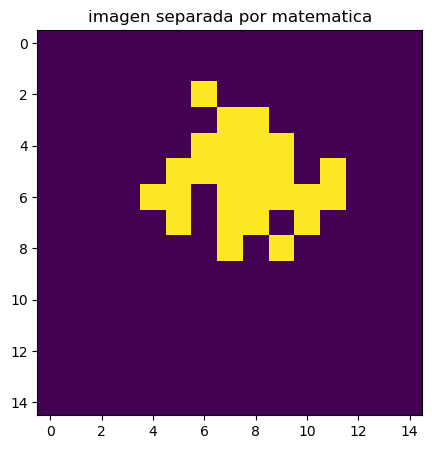

In [17]:
r_celula=celula[:,:,0]*255
g_celula=celula[:,:,1]*255
b_celula=celula[:,:,2]*255

r_celula=r_celula>200
g_celula=g_celula>100
b_celula=b_celula>200

#convertir array bidimensional
img_final=np.array(r_celula*g_celula*b_celula*255,dtype=int)

plt.imshow(img_final)
plt.title('imagen separada por matematica')
plt.show()

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def solarizar(image,umbral):
    img_solarizar=np.where(image<umbral,image,255-image)
    return img_solarizar 


practica:
realiza un pequeño script que permita visualizar una lista de paleta de colores disponibles en opencv a través de un ciclo pepetitivo.

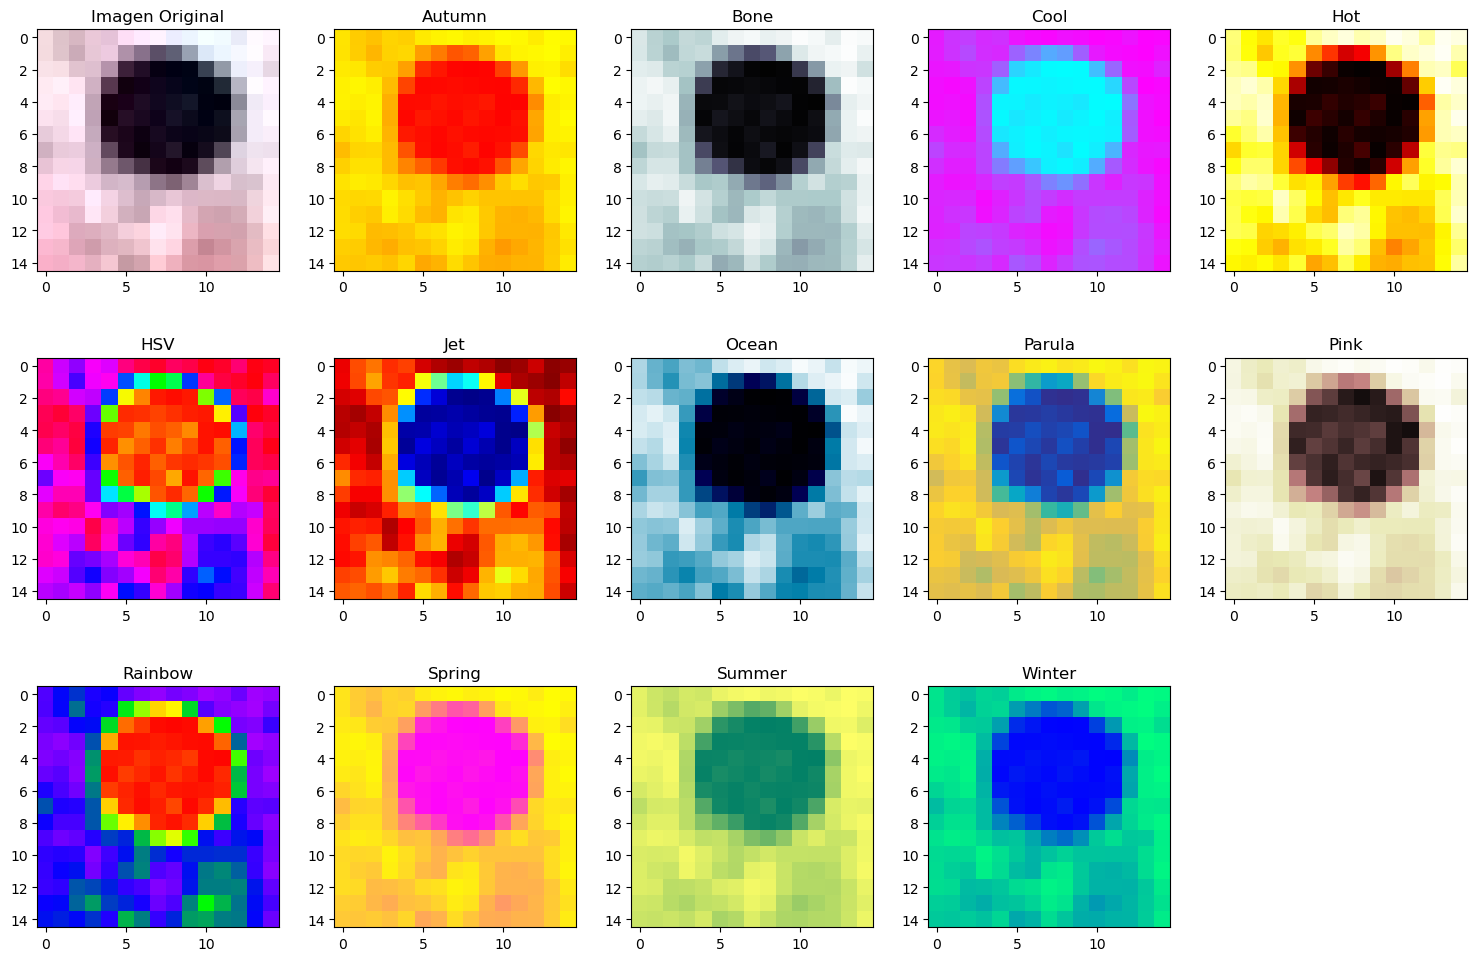

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Lista de paletas de colores predefinidas en OpenCV
paletas = [cv2.COLORMAP_AUTUMN, cv2.COLORMAP_BONE, cv2.COLORMAP_COOL,
           cv2.COLORMAP_HOT, cv2.COLORMAP_HSV, cv2.COLORMAP_JET,
           cv2.COLORMAP_OCEAN, cv2.COLORMAP_PARULA, cv2.COLORMAP_PINK,
           cv2.COLORMAP_RAINBOW, cv2.COLORMAP_SPRING, cv2.COLORMAP_SUMMER,
           cv2.COLORMAP_WINTER]

# Lista de nombres de las paletas de colores
nombres_paletas = ["Autumn", "Bone", "Cool", "Hot", "HSV", "Jet", "Ocean", 
                   "Parula", "Pink", "Rainbow", "Spring", "Summer", "Winter"]

# Cargar la imagen
imagen = cv2.imread("celula_cancer.jpg")

# Mostrar la imagen original
plt.figure(figsize=(15, 10))
plt.subplot(3, 5, 1)
plt.imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))
plt.title("Imagen Original")


# Ciclo para mostrar cada paleta de colores aplicada a la imagen
for i, paleta in enumerate(paletas):
    # Aplicar la paleta de colores a la imagen
    imagen_paleta = cv2.applyColorMap(imagen, paleta)    
    # Mostrar la imagen con la paleta de colores y su nombre
    plt.subplot(3, 5, i+2)
    plt.imshow(cv2.cvtColor(imagen_paleta, cv2.COLOR_BGR2RGB))
    plt.title(nombres_paletas[i])
plt.tight_layout()
plt.show()
